# Simple Moving Average (SMA) in Python implementieren
**Ziel dieses Notebooks**: Verstehen und Implementieren des Simple Moving Average (SMA) 
mit dem Aktienkursen von Apple, ausgelesen mit der API von YahooFinance.

Der Simple Moving Average ist ein gleitender Durchschnitt, der die letzten $n$ Schlusspreise
einer Aktie gleichmäßig mittelt. Er dient als Trendindikator in der technischen Analyse. 
Die Formel zum Berechnen des SMA sieht wie folgt aus:
$$
\text{SMA}_n(t) = \frac{P_t + P_{t-1} + \dots + P_{t-n+1}}{n}
$$
- $P_t$ = Schlusspreis am Tag $t$
- $n$ = Fenstergröße (z. B. $5$, $20$, $50$)

Dabei sind, wie zu erwarten, die ersten $n-1$ Werte nicht gültig.

Das Notebook ist wie folgt strukturiert:
1. Daten von Apple mit yfinance laden
2. SMA($5$) und SMA($20$) berechnen
3. Visualisierung mit matplotlib

Zunächst importiere ich die notwendigen Bibliotheken:

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## Daten von Apple laden

In diesem Schritt ladenich reale historische Kursdaten von der Apple Aktie mittels der Yahoo Finance API herunter. Ich nutze den Zeitraum des letzten Jahres (period = "1y") mit täglichen Schlusspreisen (interval="1d"). Der Parameter "auto_adjust=False" sorgt dafür, dass ich die rohen Schlusspreise erhalte. Die Daten werden in einem pandas.DataFrame gespeichert. Anschließend lasse ich mir die ersten 25 Einträge der Spalte "Adj Close" anzeigen.

In [102]:
data = yf.download("AAPL", period = "1y", interval = "1d", auto_adjust=False)
print(data["Adj Close"].head(25))

[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2024-11-14  227.192459
2024-11-15  223.986954
2024-11-18  226.993362
2024-11-19  227.252197
2024-11-20  227.968948
2024-11-21  227.491119
2024-11-22  228.835022
2024-11-25  231.821533
2024-11-26  234.001678
2024-11-27  233.872238
2024-11-29  236.261459
2024-12-02  238.511261
2024-12-03  241.557495
2024-12-04  241.915863
2024-12-05  241.945755
2024-12-06  241.746643
2024-12-09  245.639023
2024-12-10  246.654449
2024-12-11  245.380219
2024-12-12  246.843582
2024-12-13  247.012817
2024-12-16  249.909714
2024-12-17  252.338730
2024-12-18  246.933197
2024-12-19  248.665344


## Berechnen der Simple Moving Averages auf Basis der 5 und 20 letzten Schlusskurse
Die Berechnung erfolgt mit pandas.rolling(window=n).mean() Funktion.  
Die ersten $n-1$ Werte sind $NaN$, da nicht genug Daten vorliegen. Das ist normal.
Anschließend lasse ich mir die berechneten Daten ausgeben und füge dem Datensetz 2 Spalten
hinzu. Diese sind jeweils die berechneten Werte für den SMA(20) und SMA(5).
Da das Überschriebene Datenset weitere Infomrationen enthält, filtere ich mit der loc[]
Funktion nach den Schlusskursen, sowie den berechneten Durchschnittswerten und zeige 
die letzten 15 Werte an.

In [103]:
data['SMA_5'] = data['Adj Close'].rolling(window=5).mean()
data['SMA_20'] = data['Adj Close'].rolling(window=20).mean()

In [104]:
print(data.loc[:,["Adj Close", "SMA_5", "SMA_20"]].tail(15))

Price        Adj Close       SMA_5      SMA_20
Ticker            AAPL                        
Date                                          
2025-10-24  262.565491  260.919061  254.781515
2025-10-27  268.549652  262.231787  255.499818
2025-10-28  268.739471  263.476581  256.217621
2025-10-29  269.438812  265.724402  256.929431
2025-10-30  271.137146  268.086115  257.642239
2025-10-31  270.108154  269.594647  258.259142
2025-11-03  268.789429  269.642603  258.876543
2025-11-04  269.778473  269.850403  259.553885
2025-11-05  269.878387  269.938318  260.157300
2025-11-06  269.508728  269.612634  260.943038
2025-11-07  268.209991  269.233002  262.101914
2025-11-10  269.429993  269.361115  263.202406
2025-11-11  275.250000  270.455420  264.588404
2025-11-12  273.470001  271.173743  265.806978
2025-11-14  274.410004  272.153998  267.166960


## Visualisierung
Die Kursentwicklung und die beiden gleitenden Durchschnitte werden mit matplotlib visualisiert.  
- Schwarze Linie: Apple Schlusspreis (Adj Close)  
- Blaue Linie: SMA(5) – kurzfristiger Trend  
- Rote Linie: SMA(20) – langfristiger Trend  

Die Linien beginnen erst dort, wo genügend Daten vorliegen (NaN-Werte werden automatisch übersprungen). 

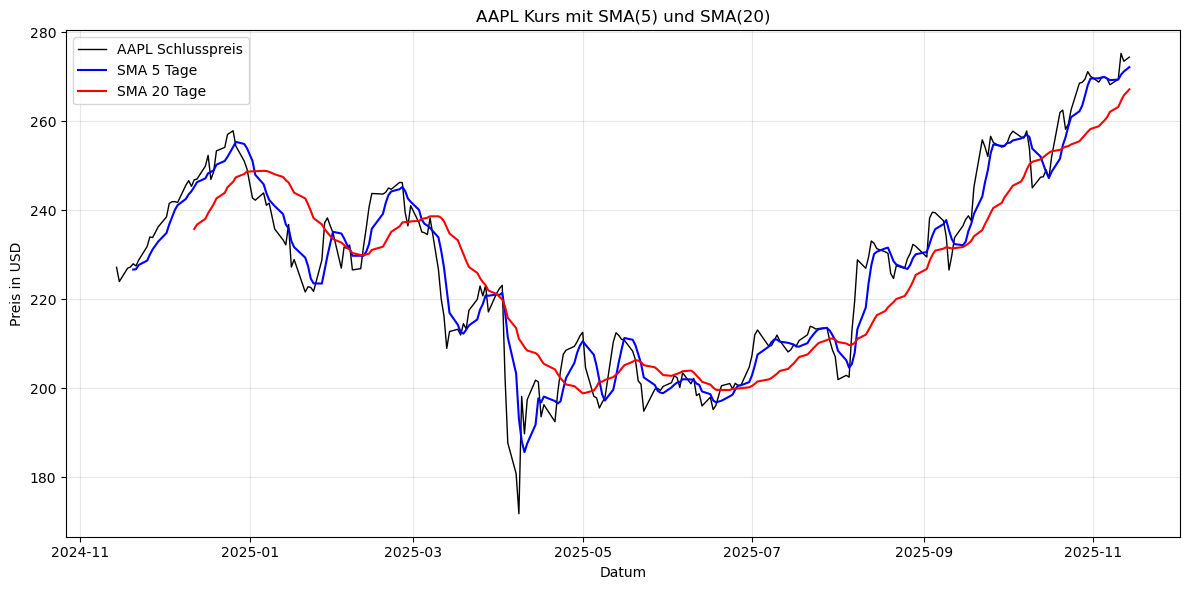

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Adj Close'], label='AAPL Schlusspreis', color='black', linewidth=1)
plt.plot(data.index, data['SMA_5'], label='SMA 5 Tage', color='blue')
plt.plot(data.index, data['SMA_20'], label='SMA 20 Tage', color='red')
plt.title('AAPL Kurs mit SMA(5) und SMA(20)')
plt.xlabel('Datum')
plt.ylabel('Preis in USD')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()